In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [20]:
from sklearn.preprocessing import StandardScaler

In [3]:
print(tf.__version__)

2.4.1


In [8]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [11]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


In [12]:
train_images.shape

(60000, 28, 28)

In [16]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names[train_labels[0]]

'Ankle boot'

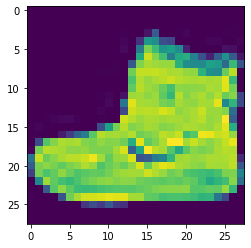

In [18]:
plt.figure()
plt.imshow(train_images[0])
plt.show()

In [19]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [30]:
train_images.shape[1]

28

In [22]:
scaler = StandardScaler()

In [24]:
scaler = {}

In [32]:
"""
for i in range(train_images.shape[1]):
  scaler[i] = StandardScaler()
  train_images[:,i,:] = scaler[i].fit_transform(train_images[:,i,:])

for i in range(X_test.shape[1]):
    test_images[:, i, :] = scalers[i].transform(test_images[:, i, :]) 
"""

'\nfor i in range(train_images.shape[1]):\n  scaler[i] = StandardScaler()\n  train_images[:,i,:] = scaler[i].fit_transform(train_images[:,i,:])\n\nfor i in range(X_test.shape[1]):\n    test_images[:, i, :] = scalers[i].transform(test_images[:, i, :]) \n'

In [33]:
train_images = train_images/255

In [34]:
test_images = test_images/255

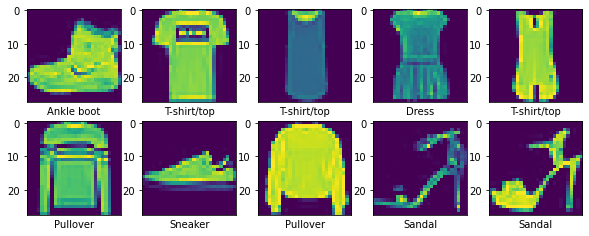

In [40]:
plt.figure(figsize = (10,10))
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [41]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])


In [42]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [43]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6340 - accuracy: 0.7778
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3820 - accuracy: 0.8628
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3412 - accuracy: 0.8765
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3076 - accuracy: 0.8862
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2885 - accuracy: 0.8926
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2815 - accuracy: 0.8959
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2634 - accuracy: 0.9004
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2581 - accuracy: 0.9032
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2370 - accuracy: 0.9131
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.230

In [44]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)

313/313 - 0s - loss: 0.3385 - accuracy: 0.8827


In [45]:
predictmodel = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [46]:
prediction = predictmodel.predict(test_images)

In [66]:
def pred(i):
  print(class_names[test_labels[i]])
  print(class_names[np.argmax(prediction[i])])

pred(12)


Sneaker
Sandal


In [77]:
count = 0
pred = []
pred_val = []
for i in range(test_labels.shape[0]):
  #pred_val.append(pred)
  pred.append(np.argmax(prediction[i]))
  if(np.argmax(prediction[i]) != test_labels[i]):
    #print(i)
    count = count+1
pred = np.array(pred) 

In [71]:
1-count/test_labels.shape[0]

0.8827

In [76]:
pred.shape

()

In [79]:
tf.math.confusion_matrix(test_labels, pred)


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[816,   1,  12,  39,   2,   2, 113,   0,  15,   0],
       [  2, 972,   3,  17,   4,   0,   1,   0,   1,   0],
       [ 13,   0, 851,  20,  45,   1,  66,   0,   4,   0],
       [ 15,   6,   9, 928,  15,   0,  22,   0,   5,   0],
       [  0,   0, 160,  58, 709,   0,  67,   0,   6,   0],
       [  0,   0,   0,   0,   0, 942,   0,  36,   3,  19],
       [105,   1,  85,  42,  44,   0, 701,   0,  22,   0],
       [  0,   0,   0,   0,   0,   3,   0, 956,   1,  40],
       [  3,   0,   1,   3,   3,   1,   2,   4, 983,   0],
       [  0,   0,   0,   0,   0,   6,   1,  24,   0, 969]], dtype=int32)>

In [86]:
print(prediction)

[[3.23371660e-06 1.26627633e-08 7.02172827e-08 ... 3.51567077e-03
  3.41211894e-08 9.96375620e-01]
 [1.47602918e-06 1.14678234e-15 9.99009609e-01 ... 1.97987367e-17
  1.18791749e-12 3.02513196e-13]
 [8.03169975e-09 1.00000000e+00 4.53660581e-10 ... 1.04182856e-23
  1.99135977e-12 3.75376404e-20]
 ...
 [2.43025897e-06 8.73274716e-12 6.99599923e-06 ... 2.35822313e-08
  9.99971747e-01 1.22519995e-12]
 [3.25927694e-08 9.99977469e-01 3.11143609e-08 ... 4.75142404e-17
  9.84684334e-09 8.21093193e-13]
 [8.37125572e-06 9.18041376e-09 1.11140398e-05 ... 3.24615627e-03
  5.77296669e-05 1.16680931e-05]]


In [85]:
m = tf.keras.metrics.Precision()
m.update_state(test_labels)
m.result().numpy()


InvalidArgumentError: ignored

In [ ]:
tf.keras.metrics.Recall(
    thresholds=0.5, top_k=None, class_id=None, name=None, dtype=None
)
